In [1]:
# basic kit - included in default anaconda env list
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
from pathlib import Path
#import pandas_profiling
import re
import collections
import math

In [2]:
from fastai.vision import *
from PIL import Image as pil_image
from src.img_functions import *

In [3]:
%load_ext autoreload
%autoreload 2

There are 3 image files.
First 3 image files:
0:	Name: data/images_beta/TrainingData_1_original.tif
	Shape: torch.Size([3, 3032, 3012])

1:	Name: data/images_beta/TrainingData_3_original.tif
	Shape: torch.Size([3, 3012, 2500])

2:	Name: data/images_beta/TrainingData_4_original.tif
	Shape: torch.Size([3, 640, 918])



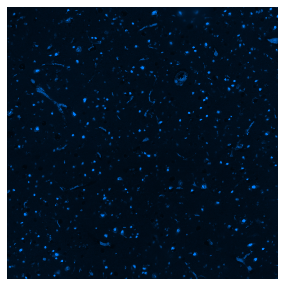

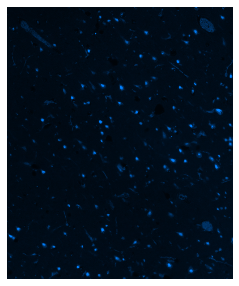

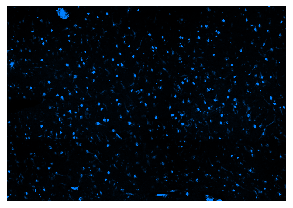

In [4]:
# images
path_img = Path('data/images_beta')   # images go here
img_names = get_image_files(path_img)  # a list of posixpath filenames
# Print out info on the training images.
train_img_test(img_names, open_image)

There are 3 images in the folder.
First 3 image files:
---------------------
0
Name: data/images_beta/TrainingData_1_original.tif
Size: Train - [3032 3012] 	Mask - [3032 3016]
Unique Color Classes:[0 1]
tensor([[[0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         [0, 0, 0,  ..., 1, 1, 1],
         ...,
         [0, 0, 0,  ..., 1, 1, 0],
         [0, 0, 0,  ..., 1, 1, 0],
         [0, 0, 0,  ..., 1, 0, 0]]])
---------------------
1
Name: data/images_beta/TrainingData_3_original.tif
Size: Train - [3012 2500] 	Mask - [3012 2500]
Unique Color Classes:[0 1]
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])
---------------------
2
Name: data/images_beta/TrainingData_4_original.tif
Size: Train - [640 918] 	Mask - [640 918]
Unique Color Classes:[0 1]
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,

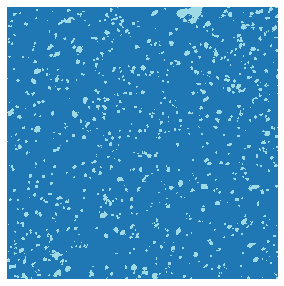

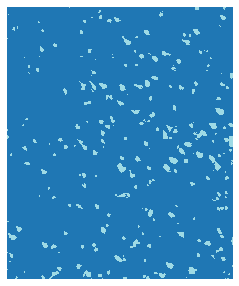

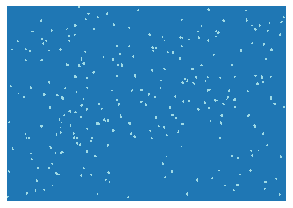

In [5]:
# masks
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'    # only works with PosixPath object
path_lbl = Path('data/labels_int_beta', )   # label images go here
lbl_names = get_image_files(path_lbl)   # a list of posixpath filenames
label_info(img_names, lbl_names, get_y_fn)   # overview of training imgaes and masks

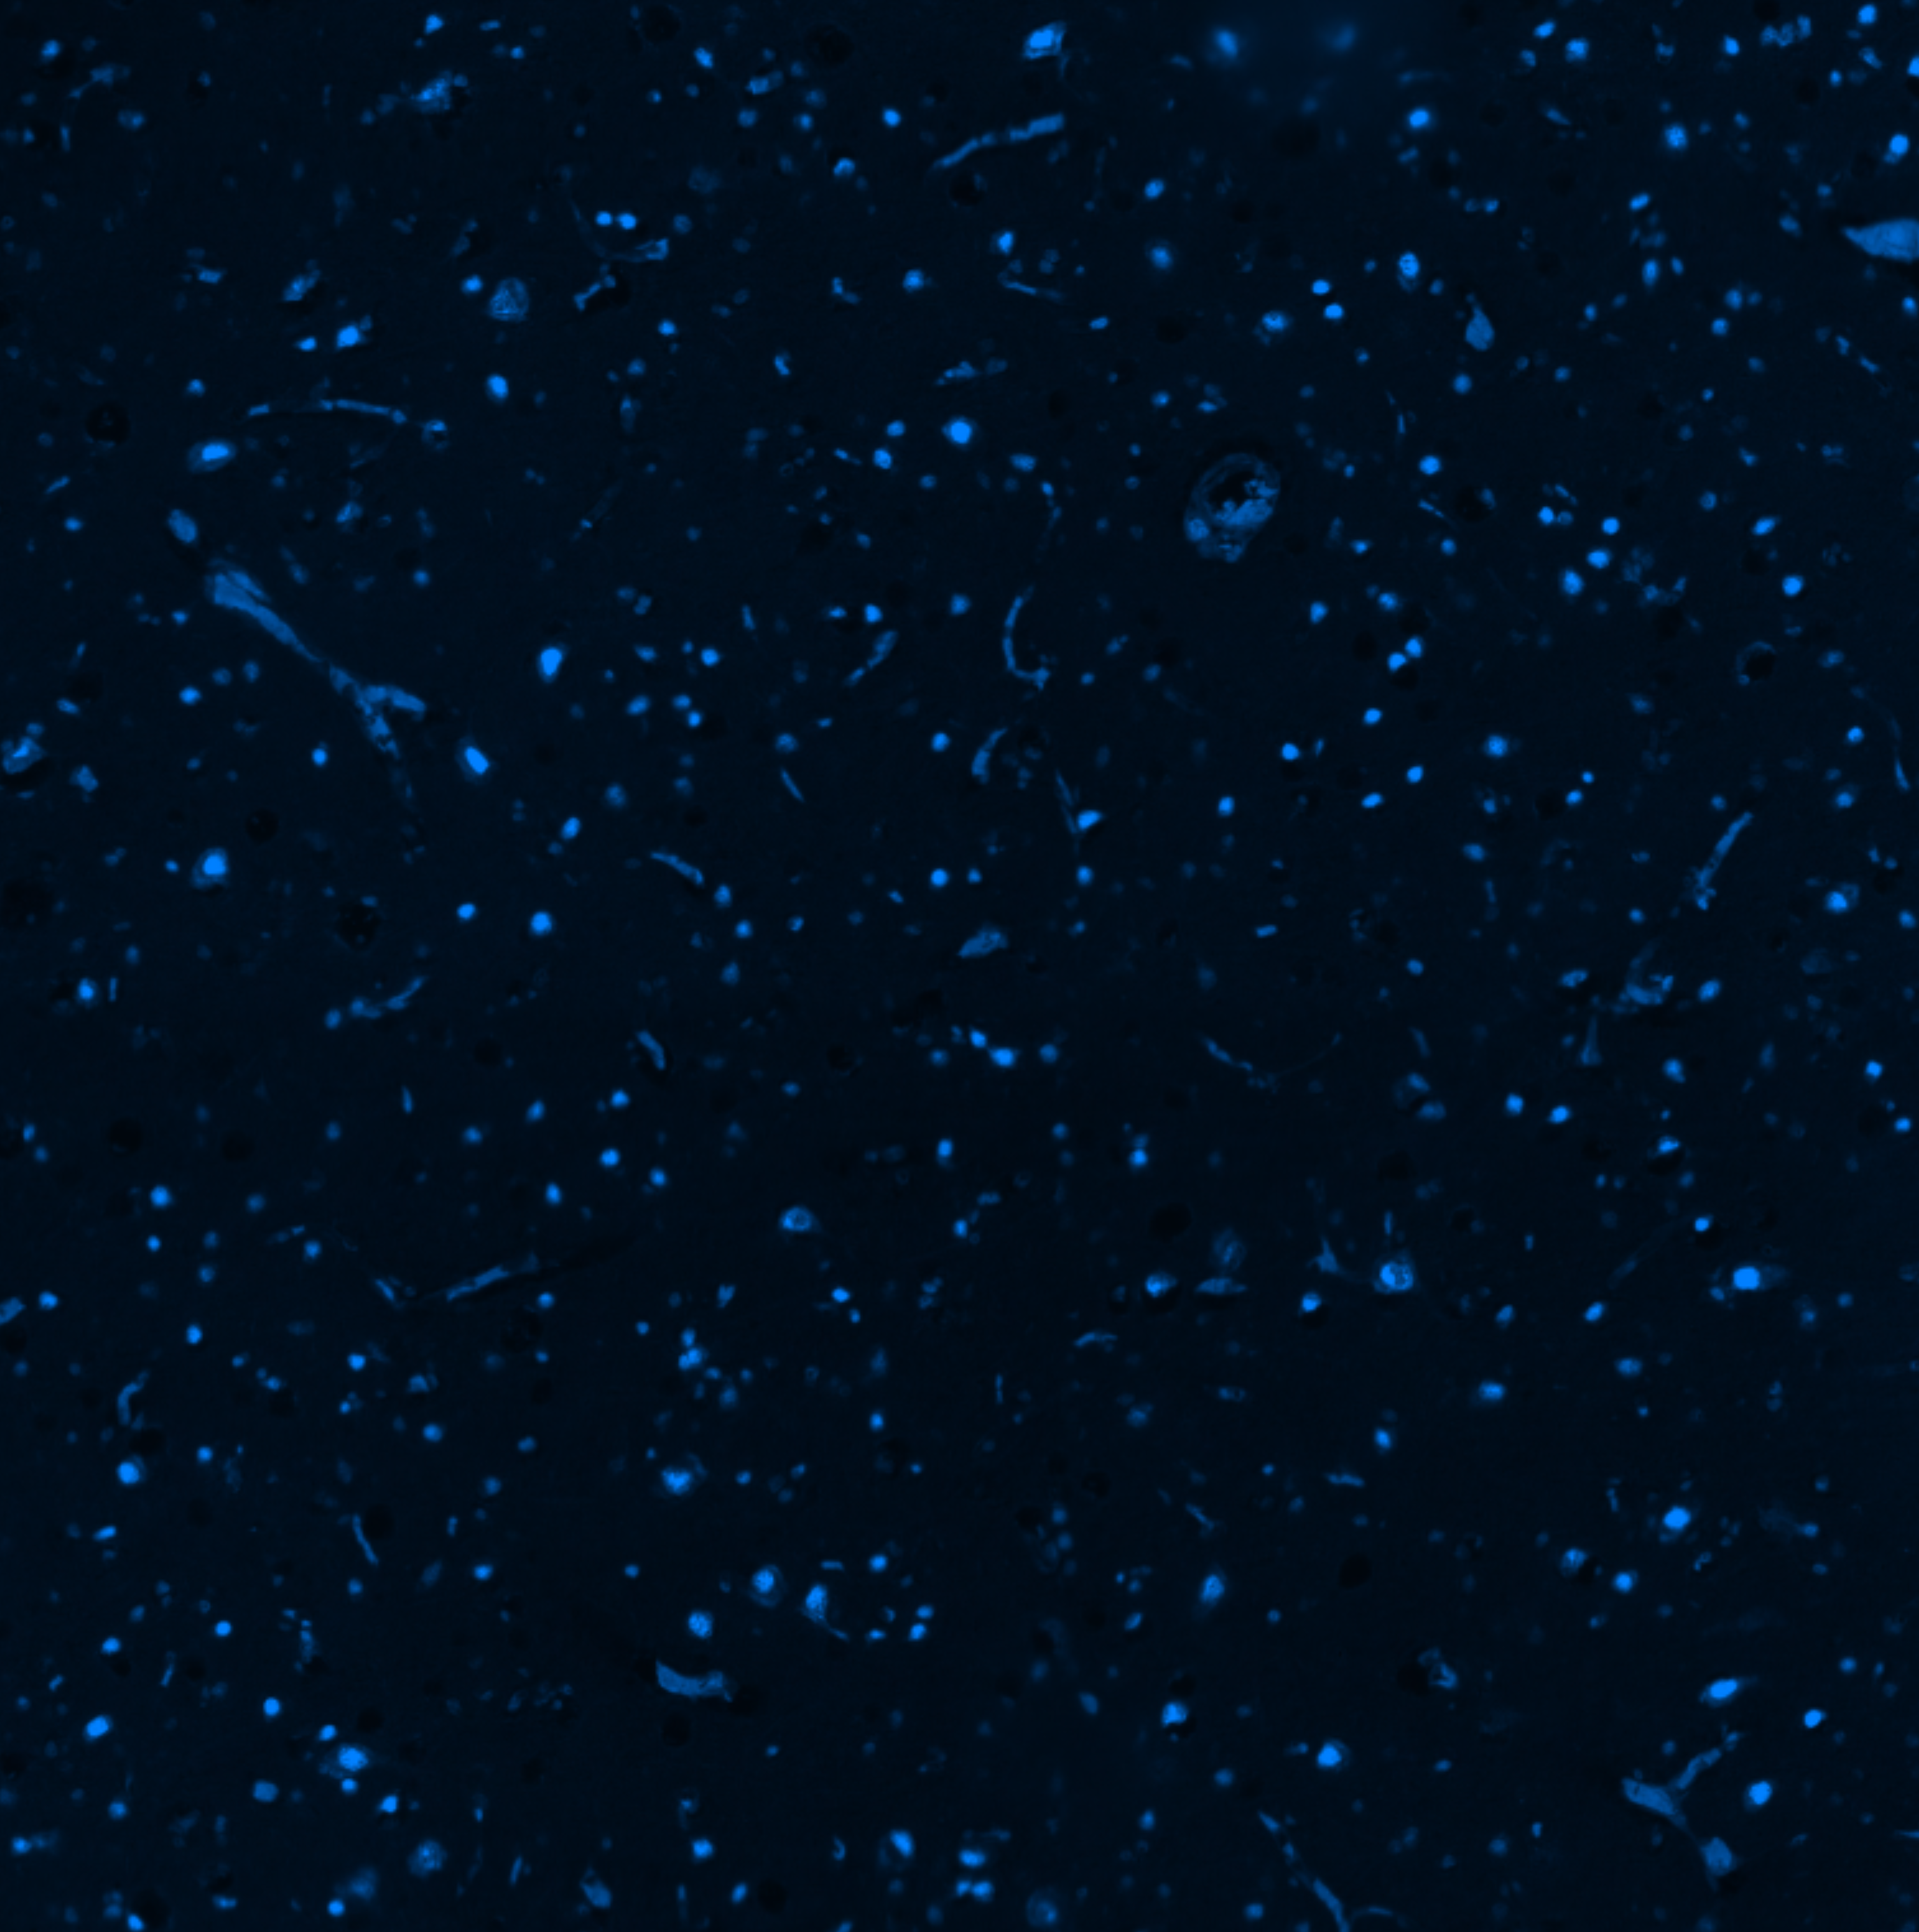

In [28]:
img = pil_image.open(get_image_files(path_img)[0])
display(img)

In [7]:
h = img.height
w = img.width
print(w,h)

3012 3032


In [8]:
import math
width_interval = math.floor(w/300)
height_interval = math.floor(h/300)

In [9]:
width_interval

10

In [32]:
get_image_files(path_img)

[PosixPath('data/images_beta/TrainingData_1_original.tif'),
 PosixPath('data/images_beta/TrainingData_3_original.tif'),
 PosixPath('data/images_beta/TrainingData_4_original.tif')]

In [31]:
img = pil_image.open(get_image_files(path_img)[0])

AttributeError: 'list' object has no attribute 'read'

'TrainingData_4_original.tif'

In [42]:
# The following approach breaks the big image into equal 300x300 boxes, but throws out the "leftover" image space

def img_slicer(save_dir, path_img):
    '''docs here'''
    for img_file in get_image_files(path_img):
        img = pil_image.open(img_file)
        width_interval = math.floor(img.width/300)
        height_interval = math.floor(img.height/300)
        for width in range(width_interval):
            for height in range(height_interval):
                box = width*300,height*300,(width+1)*300,(height+1)*300
                region = img.crop(box)
                # 300-300-TrainingData_1_original.tif
                fname = "{}-{}-{}".format(width*300, height*300,img_file.parts[-1]) # change to dynamic
                region.save(save_dir+fname)

In [ ]:
# images 
save_dir = 'data/images_sliced/'
img_slicer(save_dir, path_img)

In [43]:
# labels
save_dir = 'data/labels_sliced/'
img_slicer(save_dir, path_lbl)

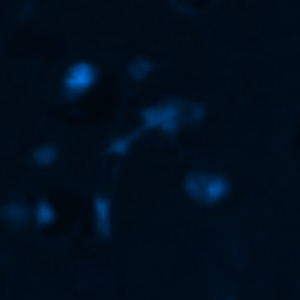

In [43]:
display(region)